#### Exploration of the given Dataset


In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [3]:
with open('data/scraped_matches/parsed_matches/final_matches.pkl', 'rb') as f:
    matches = pickle.load(f)
    
#load masterdata
with open('masterdata/elo_frames.pkl', 'rb') as f:
        elo_frames = pickle.load(f)


In [6]:
matches_df = pd.DataFrame.from_dict(matches, orient='index')
export_df = matches_df.copy()

In [3]:
elo_frames

{'low': {'lb': 0, 'ub': 1062, 'label': 'Low Elo'},
 'medium': {'lb': 1062, 'ub': 1501, 'label': 'Medium Elo'},
 'high': {'lb': 1501, 'ub': 3000, 'label': 'High Elo'}}

In [4]:
#viz ideas
"""
-civ picks over elo
-civ wr over elo
-civ wr over time
-civ wr

"""

'\n-civ picks over elo\n-civ wr over elo\n-civ wr over time\n-civ wr\n\n'

In [5]:
viz_path = 'Visualizations/'

In [6]:
matches_df = pd.DataFrame.from_dict(matches, orient='index')
matches_df.shape

matches_df['avg_elo'] = (matches_df['p1_elo'] + matches_df['p2_elo'])/2

In [7]:
matches_df

,match_id,fn,map,map_size,duration,dataset,difficulty,input_fn,gaia_fn,p1_name,...,p1_elo,p2_elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,avg_elo
50453403,50453403,?gameId=50453403&profileId=594394,Arabia,Tiny,3445,Definitive Edition,Hardest,data/scraped_matches/inputs/50453403.pkl,data/scraped_matches/gaia_data/50453403.pkl,Zirafo,...,975,1233,Vikings,Mayans,92.0,24.0,37.0,78.0,0,1104.0
118982970,118982970,?gameId=118982970&profileId=276148,Arena,Tiny,2932,Definitive Edition,Hardest,data/scraped_matches/inputs/118982970.pkl,data/scraped_matches/gaia_data/118982970.pkl,Hadramut,...,882,887,Britons,Goths,70.0,82.0,16.0,98.0,0,884.5
57185801,57185801,?gameId=57185801&profileId=1476497,Arena,Tiny,2573,Definitive Edition,Hardest,data/scraped_matches/inputs/57185801.pkl,data/scraped_matches/gaia_data/57185801.pkl,LionFyah,...,889,922,Chinese,Malians,69.0,61.0,16.0,104.0,0,905.5
64335748,64335748,?gameId=64335748&profileId=1480279,Arabia,Tiny,851,Definitive Edition,Hardest,data/scraped_matches/inputs/64335748.pkl,data/scraped_matches/gaia_data/64335748.pkl,voltapette,...,1154,1006,Mayans,Magyars,25.0,98.0,80.0,68.0,1,1080.0
116883036,116883036,?gameId=116883036&profileId=3366080,Arabia,Tiny,4737,Definitive Edition,Hardest,data/scraped_matches/inputs/116883036.pkl,data/scraped_matches/gaia_data/116883036.pkl,KCube,...,984,1116,Berbers,Slavs,83.0,30.0,28.0,85.0,1,1050.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137272191,137272191,?gameId=137272191&profileId=472325,Arabia,Tiny,2525,Definitive Edition,Hardest,data/scraped_matches/inputs/137272191.pkl,data/scraped_matches/gaia_data/137272191.pkl,einstein,...,1566,1514,Mongols,Byzantines,19.0,98.0,53.0,54.0,1,1540.0
114000000,114000000,?gameId=114000000&profileId=1766990,Nomad,Tiny,3208,Definitive Edition,Hardest,data/scraped_matches/inputs/114000000.pkl,data/scraped_matches/gaia_data/114000000.pkl,dchavezb.45,...,1078,1054,Berbers,Ethiopians,NaN,NaN,NaN,NaN,0,1066.0
124942713,124942713,?gameId=124942713&profileId=3918173,Arabia,Tiny,4243,Definitive Edition,Hardest,data/scraped_matches/inputs/124942713.pkl,data/scraped_matches/gaia_data/124942713.pkl,Olas,...,863,878,Bulgarians,Ethiopians,101.0,40.0,56.0,20.0,1,870.5
141486159,141486159,?gameId=141486159&profileId=9353005,Arabia,Tiny,3280,Definitive Edition,Hardest,data/scraped_matches/inputs/141486159.pkl,data/scraped_matches/gaia_data/141486159.pkl,Cristof,...,1291,1178,Turks,Indians,24.0,99.0,78.0,55.0,1,1234.5


In [8]:
matches_df.dataset.unique()
arabia_df = matches_df[matches_df['map']=='Arabia']
matches_df_bu = matches_df
matches_df = arabia_df

In [9]:
matches_df['p1_elo'].describe()

count    138902.000000
mean       1149.133353
std         252.524900
min         679.000000
25%         968.000000
50%        1081.000000
75%        1267.000000
max        2666.000000
Name: p1_elo, dtype: float64

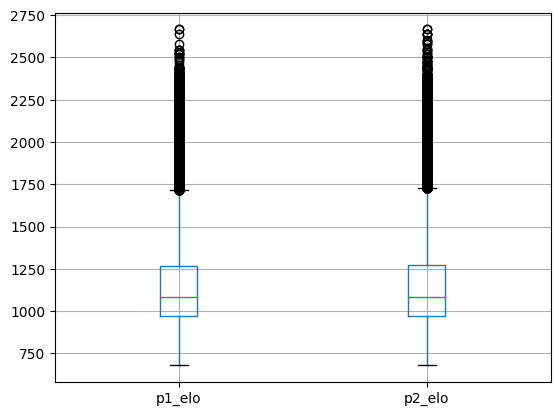

In [10]:
boxplot = matches_df.boxplot(column=['p1_elo', 'p2_elo']) 

plt.show()

In [11]:
#elo diff
"""
plt.rcParams["figure.figsize"] = (10,4)
elo_comp = matches_df['p1_elo'] - matches_df['p2_elo']
elo_comp.plot(kind='hist',bins= range(-750,750,1))
plt.axis([-750,750,0,elo_comp.max()])
plt.axvline(elo_comp.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()
"""

'\nplt.rcParams["figure.figsize"] = (10,4)\nelo_comp = matches_df[\'p1_elo\'] - matches_df[\'p2_elo\']\nelo_comp.plot(kind=\'hist\',bins= range(-750,750,1))\nplt.axis([-750,750,0,elo_comp.max()])\nplt.axvline(elo_comp.mean(), color=\'k\', linestyle=\'dashed\', linewidth=1)\nplt.show()\n'

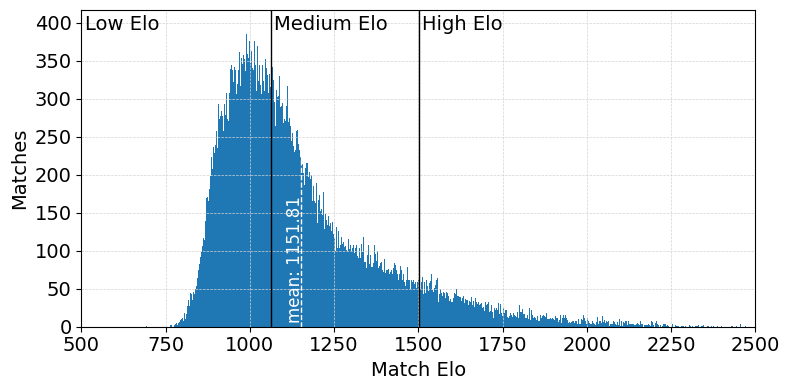

In [64]:
plt.clf()
plt.rcParams["figure.figsize"] = (8,4)
name = "mean_elo_dist"
ax=plt.axes()
ax.set_facecolor("white")

elo_avg = matches_df['avg_elo']
elo_avg.plot(kind='hist',bins= range(500,2501,1))
plt.axvline(elo_avg.mean(), color='white', linestyle='dashed', linewidth=1)
plt.text(elo_avg.mean()-45,10,f'mean: {round(elo_avg.mean(),2)}',rotation=90,color = 'white',fontsize=12)

label_height = 390

plt.text(510,label_height,'Low Elo',fontsize=14)
plt.axvline(1062, color='k', linestyle='solid', linewidth=1)
plt.text(1072,label_height,'Medium Elo',fontsize=14)
plt.axvline(1501, color='k', linestyle='solid', linewidth=1)
plt.text(1511,label_height,'High Elo',fontsize=14)




plt.grid(color='lightgrey', linestyle='--', linewidth=0.5,which='major')
plt.xlabel("Match Elo",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Matches",fontsize=14)
plt.yticks(fontsize=14)
plt.margins(x=0.00)
plt.tight_layout()
plt.savefig(viz_path+name + '.pdf',format='pdf',facecolor='white')
plt.show()

In [13]:
elo_avg.describe([i for i in np.arange(0,1,0.05)])

count    138902.000000
mean       1151.810010
std         243.785762
min         693.000000
0%          693.000000
5%          885.000000
10%         914.000000
15%         938.500000
20%         959.500000
25%         980.000000
30%         999.500000
35%        1019.500000
40%        1040.500000
45%        1062.000000
50%        1084.000000
55%        1108.500000
60%        1135.000000
65%        1166.000000
70%        1205.500000
75%        1256.000000
80%        1319.500000
85%        1398.000000
90%        1501.000000
95%        1651.000000
max        2523.000000
Name: avg_elo, dtype: float64

In [14]:
elo_avg.describe([0.95])

count    138902.000000
mean       1151.810010
std         243.785762
min         693.000000
50%        1084.000000
95%        1651.000000
max        2523.000000
Name: avg_elo, dtype: float64

In [15]:
#p1_elo
"""
elos = matches_df['p1_elo']
plt.rcParams["figure.figsize"] = (10,4)
elos.plot(kind='hist',bins= range(500,2500,10))
plt.axvline(elos.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()
"""


'\nelos = matches_df[\'p1_elo\']\nplt.rcParams["figure.figsize"] = (10,4)\nelos.plot(kind=\'hist\',bins= range(500,2500,10))\nplt.axvline(elos.mean(), color=\'k\', linestyle=\'dashed\', linewidth=1)\nplt.show()\n'

In [16]:
#p2_elo
"""
elos = matches_df['p2_elo']
plt.rcParams["figure.figsize"] = (10,4)
elos.plot(kind='hist',bins= range(500,2500,10))
plt.axvline(elos.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()
"""

'\nelos = matches_df[\'p2_elo\']\nplt.rcParams["figure.figsize"] = (10,4)\nelos.plot(kind=\'hist\',bins= range(500,2500,10))\nplt.axvline(elos.mean(), color=\'k\', linestyle=\'dashed\', linewidth=1)\nplt.show()\n'

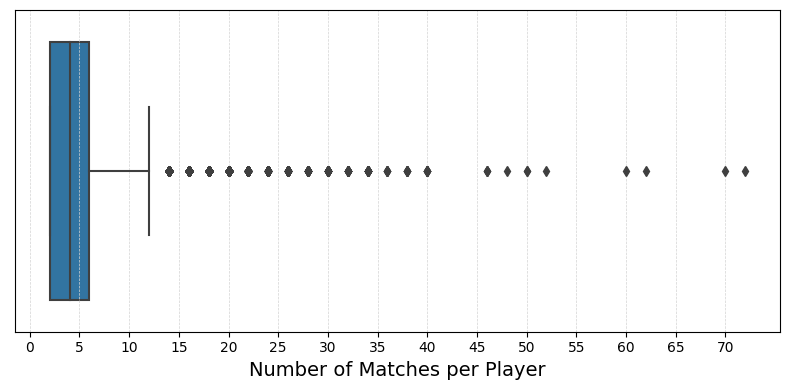

In [17]:
######player count
name = "player_freq_dist"
plt.cla()

p1 = matches_df['p1_name']
p2 = matches_df['p1_name']

plt.rcParams["figure.figsize"] = (10,2)
tot_df = pd.concat([p1,p2],axis=0).rename("Player_Frequency").to_frame()
players = tot_df.groupby(['Player_Frequency'])['Player_Frequency'].count().sort_values(ascending=False)

#bp=players.to_frame().boxplot(column=['Player_Frequency'],vert=False,widths=0.8) 
sns.boxplot(data=players.to_frame(),orient='h')
#bp = plt.boxplot(players.to_frame()['Player_Frequency'],vert=False,widths=0.8)
#[item.get_xdata() for item in bp['whiskers']]

plt.xticks(range(0,75,5))
plt.xlabel("Number of Matches per Player",fontsize=14)


plt.grid(color='lightgrey', linestyle='--', linewidth=0.5,which='major')
plt.yticks([])
#plt.margins(x=0.0)
plt.tight_layout()
plt.savefig(viz_path+name+ '.pdf',format='pdf')
plt.show()
#players.plot(kind='hist',bins = range(0,120,1))
#plt.margins(x=0)



In [18]:
players.describe([i for i in np.arange(0,1,0.05)])

count    59561.000000
mean         4.664193
std          3.831571
min          2.000000
0%           2.000000
5%           2.000000
10%          2.000000
15%          2.000000
20%          2.000000
25%          2.000000
30%          2.000000
35%          2.000000
40%          2.000000
45%          2.000000
50%          4.000000
55%          4.000000
60%          4.000000
65%          4.000000
70%          6.000000
75%          6.000000
80%          6.000000
85%          8.000000
90%         10.000000
95%         12.000000
max         72.000000
Name: Player_Frequency, dtype: float64

**Get Info about the maps**

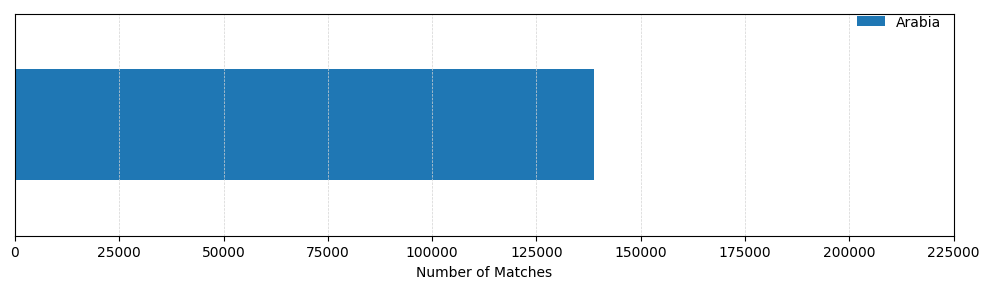

In [19]:
#map distribution
name = "map_dist"
threshold = 3000


from matplotlib.pyplot import cm
cmap = plt.get_cmap("tab10")
color_list = [cmap(c) for c in range(10)]
color_list.append((0.2510,0.2510,0.2510,1.0))
color_list


maps = matches_df.groupby(['map'])['map'].count()
maps.sort_values(axis=0,ascending=False,inplace=True)
#sum other category
maps.loc['Other'] = maps[maps < threshold].sum()
maps.drop(maps[maps < threshold].index, inplace=True)


maps_df = maps.to_frame().T



maps_df.plot.barh(stacked=True,color=color_list, figsize=(10,3))
plt.xticks(ticks=range(0,250000,25000))
plt.xlabel("Number of Matches")
plt.legend(bbox_to_anchor=(1, 1.05),frameon = False)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5,which='major')
plt.yticks([])
plt.tight_layout()
plt.savefig(viz_path+name)
plt.show() 

Civs


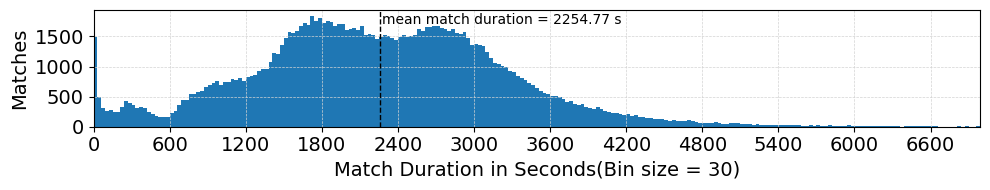

In [20]:
#duration distribution
plt.clf()
plt.cla()
name = "duration_dist"
durations = arabia_df['duration']
plt.rcParams["figure.figsize"] = (8,4)
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5,which='major')
plt.hist(durations,bins= range(0,7000,30), alpha=1)
#sns.histplot(data=durations,bins= range(0,7000,30),color='tab:blue', alpha=1)
plt.axvline(durations.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(durations.mean()+20,1700,f'mean match duration = {round(durations.mean(),2)} s',rotation=0)
plt.xlabel("Match Duration in Seconds(Bin size = 30)")
plt.xticks(ticks=range(0,7000,600))

plt.margins(x=0.00)
plt.xlabel("Match Duration in Seconds(Bin size = 30)",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Matches",fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig(viz_path+name + '.pdf',format='pdf')
plt.show()


Duration

In [21]:
percentiles=[i*0.05 for i in range(20)]
percentiles.append(0.991)
durations.describe(percentiles)


count    138902.000000
mean       2254.770457
std        1007.601070
min           0.000000
0%            0.000000
5%          604.000000
10%         995.100000
15%        1263.000000
20%        1466.000000
25%        1605.250000
30%        1727.000000
35%        1845.000000
40%        1967.000000
45%        2095.000000
50%        2228.000000
55%        2368.000000
60%        2508.000000
65%        2639.000000
70%        2765.000000
75%        2896.000000
80%        3039.000000
85%        3215.000000
90%        3456.000000
95%        3882.000000
99.1%      5000.782000
max       12618.000000
Name: duration, dtype: float64

In [22]:

#civs = matches_df.groupby(['map'])['map'].count()
#maps.sort_values(axis=0,ascending=False,inplace=True)
#civ_count

In [23]:
civ1 = matches_df['p1_civ']
civ2 = matches_df['p2_civ']
civ_tot = pd.DataFrame(pd.concat([civ1,civ2], 
                  ignore_index = True),columns=['civ'])

civ_count = civ_tot.groupby(['civ'])['civ'].count().sort_values(ascending=False)
ordered_civs = civ_count.keys().to_list()

civ_elo1 = matches_df[['p1_civ','p1_elo']]
civ_elo2 = matches_df[['p2_civ','p2_elo']]

civ_elo1.columns = ['civ','elo']
civ_elo2.columns = ['civ','elo']

civ_elo_df = pd.concat([civ_elo1,civ_elo2])
civ_elo_avg = civ_elo_df.groupby(['civ'])['elo'].mean().reindex(ordered_civs)#.sort_values(ascending=False)
civ_count.describe()

count       39.000000
mean      7123.179487
std       5664.014909
min       1159.000000
25%       3818.000000
50%       5642.000000
75%       7982.500000
max      30204.000000
Name: civ, dtype: float64

<Figure size 1000x600 with 0 Axes>

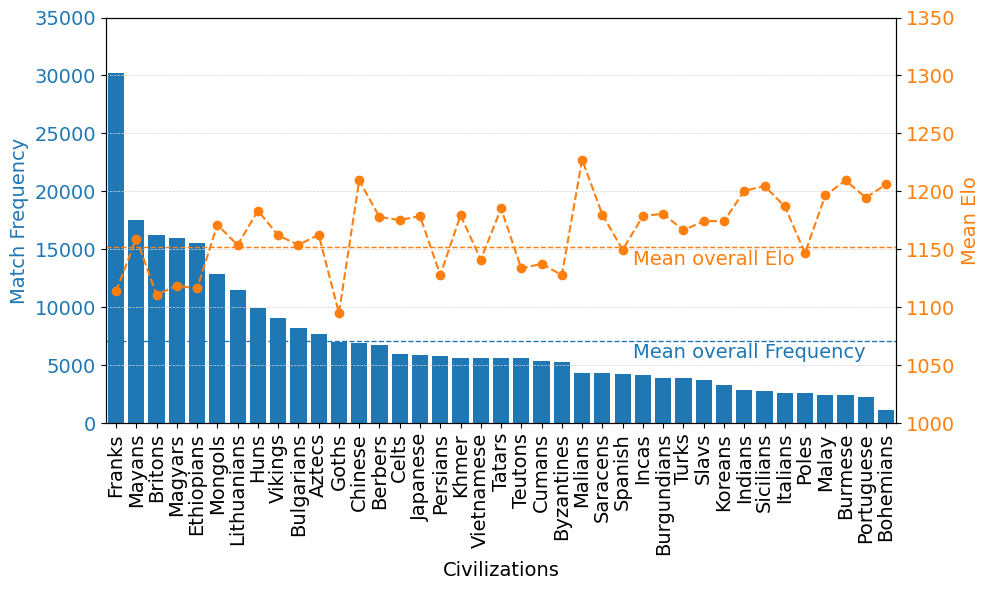

In [49]:
plt.clf()
name = "civ_elo_dist"
plt.rcParams["figure.figsize"] = (10,6)
fig,ax1 = plt.subplots()

ax1.bar(range(0,len(ordered_civs)),height=civ_count,align='center')
ax1.set_xlabel("Civilizations", fontsize=14)
ax1.set_xticks([i for i in range(len(ordered_civs))],ordered_civs,fontsize=14,rotation=90)
ax1.set_ylabel("Match Frequency",fontsize=14, color = 'tab:blue')
ax1.grid(color='lightgrey', linestyle='--', linewidth=0.5,which='major',axis='y')
ax1.set_yticks(ticks=range(0,35001,5000), color = 'tab:blue')
plt.yticks(fontsize =14,color = 'tab:blue')


plt.axhline(7123.18, linestyle='dashed', linewidth=1,color='tab:blue')
plt.text(25.5,5600.18,'Mean overall Frequency',color = 'tab:blue',fontsize=14)

ax2 = ax1.twinx()
ax2.plot(civ_elo_avg,'--o',color='tab:orange',label='Mean Elo per civ')
ax2.set_yticks(ticks=range(1000,1400,50), color = 'tab:orange')
ax2.set_ylabel("Mean Elo",fontsize=14, color = 'tab:orange')


plt.axhline(1151.81, linestyle='dashed', linewidth=1,color='tab:orange')
plt.text(25.5,1136.81,'Mean overall Elo',color = 'tab:orange', fontsize=14)

plt.yticks(fontsize=14, color = 'tab:orange')

ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.xlim(-0.5,len(ordered_civs)-.5)
plt.margins(x=0.00)
plt.tight_layout()
plt.savefig(viz_path+name + '.pdf', format='pdf')
plt.show()


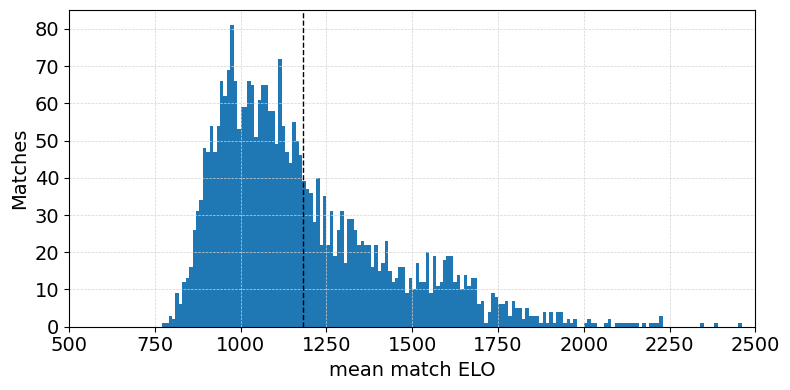

In [25]:
####elo dist per civ
civ = 'Japanese'
plt.rcParams["figure.figsize"] = (8,4)
name = f"{civ}_elo_dist"


civ_df = matches_df[matches_df['p1_civ']==civ]

elo_avg = (civ_df['p1_elo'] + matches_df['p2_elo'])/2
elo_avg.plot(kind='hist',bins= range(500,2501,10))
plt.axvline(elo_avg.mean(), color='k', linestyle='dashed', linewidth=1)
#plt.text(elo_avg.mean()+20,700,f'mean overall ELO: {round(elo_avg.mean(),2)}',rotation=0,fontsize=14)

plt.grid(color='lightgrey', linestyle='--', linewidth=0.5,which='major')
plt.xlabel("mean match ELO",fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Matches",fontsize=14)
plt.yticks(fontsize=14)
plt.margins(x=0.00)
plt.tight_layout()
plt.savefig(viz_path+name)
plt.show()

In [26]:
elo_avg

100000834   NaN
100001275   NaN
100001469   NaN
100001546   NaN
100001928   NaN
             ..
99997152    NaN
99998523    NaN
99998534    NaN
99999545    NaN
99999889    NaN
Length: 138902, dtype: float64

In [27]:
matches_df.head()

,match_id,fn,map,map_size,duration,dataset,difficulty,input_fn,gaia_fn,p1_name,...,p1_elo,p2_elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,avg_elo
50453403,50453403,?gameId=50453403&profileId=594394,Arabia,Tiny,3445,Definitive Edition,Hardest,data/scraped_matches/inputs/50453403.pkl,data/scraped_matches/gaia_data/50453403.pkl,Zirafo,...,975,1233,Vikings,Mayans,92.0,24.0,37.0,78.0,0,1104.0
64335748,64335748,?gameId=64335748&profileId=1480279,Arabia,Tiny,851,Definitive Edition,Hardest,data/scraped_matches/inputs/64335748.pkl,data/scraped_matches/gaia_data/64335748.pkl,voltapette,...,1154,1006,Mayans,Magyars,25.0,98.0,80.0,68.0,1,1080.0
116883036,116883036,?gameId=116883036&profileId=3366080,Arabia,Tiny,4737,Definitive Edition,Hardest,data/scraped_matches/inputs/116883036.pkl,data/scraped_matches/gaia_data/116883036.pkl,KCube,...,984,1116,Berbers,Slavs,83.0,30.0,28.0,85.0,1,1050.0
125287851,125287851,?gameId=125287851&profileId=3079077,Arabia,Tiny,2899,Definitive Edition,Hardest,data/scraped_matches/inputs/125287851.pkl,data/scraped_matches/gaia_data/125287851.pkl,TiM,...,1708,1637,Vikings,Mayans,101.0,16.0,58.0,56.0,0,1672.5
107928939,107928939,?gameId=107928939&profileId=2509560,Arabia,Tiny,1824,Definitive Edition,Hardest,data/scraped_matches/inputs/107928939.pkl,data/scraped_matches/gaia_data/107928939.pkl,TyphoonBD,...,1174,1096,Chinese,Japanese,46.0,84.0,97.0,28.0,1,1135.0


In [28]:

#civ_elo_df['order'] = civ_elo_df.apply(lambda row: ordered_civs.index(row['civ']),axis=1)
#civ_elo_df.sort_values(by='order')


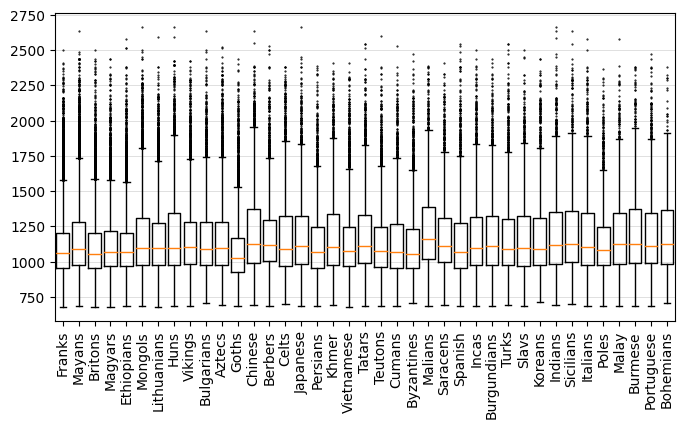

In [29]:

#sel_civs = ['Mayans','Goths', 'Malians']
#fig = plt.figure(figsize =(10, 7))

fig, ax = plt.subplots()
for index, civ in enumerate(ordered_civs):
    ax.boxplot(civ_elo_df[civ_elo_df['civ']==civ]['elo'], positions=[index],widths=0.8, 
               flierprops={'marker': '.', 'markersize': 1, 'markerfacecolor': 'black'})

#boxplot = civ_elo_df.boxplot(by='civ',column=['elo'],positions=['order']) 
plt.xticks([i for i in range(len(ordered_civs))],ordered_civs,rotation=90)
plt.grid(color='lightgrey', linestyle='-', linewidth=0.5,which='major',axis='y')
plt.show()



In [30]:
matches_df = arabia_df
winner_df = matches_df.groupby(['winner','p1_civ','p2_civ']).size()
#matches_df = matches_df[matches_df['p1_civ']=='Franks']

In [31]:
elo_frames

{'low': {'lb': 0, 'ub': 1062, 'label': 'Low Elo'},
 'medium': {'lb': 1062, 'ub': 1501, 'label': 'Medium Elo'},
 'high': {'lb': 1501, 'ub': 3000, 'label': 'High Elo'}}

In [32]:
#settings
match_threshold = 10
elo_steps = False


if elo_steps:
    elo_windows = elo_frames
else:
    elo_windows = {'all': {'lb': 0, 'ub': 3000, 'label': 'All Elo'}}

elo_civ_wr = {}

wr_elo_crosstabs = {}
matches_per_elo_dict = {}

for elo_id in elo_windows:
    elo_df = matches_df[(matches_df['avg_elo'] < elo_windows[elo_id]['ub']) &  (matches_df['avg_elo'] >=  elo_windows[elo_id]['lb'])]
    civs = []
    elo_civ_wr[elo_id] = {}
    
    
    #collect civs
    for index, row in matches_df.iterrows():
        if row['p1_civ'] not in civs:
            civs.append(row['p1_civ'])
        if row['p2_civ'] not in civs:
            civs.append(row['p2_civ'])

    civs.sort()


    #create initial crosstab
    win_crosstab = {}
    winrate_crosstab = {}
    match_count = {}
    match_count_cum = {}
    matches_per_elo = elo_df.shape[0]

    for civ1 in civs: 
        win_crosstab[civ1] = {}
        #win_crosstab = {}
        match_count[civ1] = {}
        for civ2 in civs:
            win_crosstab[civ1][civ2] = 0
            match_count[civ1][civ2] = 0

    #sum up match results
    for index, row in elo_df.iterrows():
        val = 0 
        if row['winner'] == 0:
            win_crosstab[row['p1_civ']][row['p2_civ']] += 1
        elif row['winner'] ==1:
            win_crosstab[row['p2_civ']][row['p1_civ']] += 1

        match_count[row['p1_civ']][row['p2_civ']] += 1
        match_count[row['p2_civ']][row['p1_civ']] += 1
            
    #calculate winrate    
    for civ1 in win_crosstab:
        winrate_crosstab[civ1] = {}
        #keep stats
        cum_wins = 0 
        cum_matchcount = 0 
        
        for civ2 in win_crosstab[civ1]:
            if match_count[civ1][civ2] > match_threshold:
                winrate_crosstab[civ1][civ2] = win_crosstab[civ1][civ2]/match_count[civ1][civ2]
                cum_wins += win_crosstab[civ1][civ2]
                cum_matchcount += match_count[civ1][civ2]
            else: winrate_crosstab[civ1][civ2] = 0.5
        try:
            elo_civ_wr[elo_id][civ1] = cum_wins/cum_matchcount
        except: elo_civ_wr[elo_id][civ1] = 0.5
        
     
    #replace with none values
    for civ1 in winrate_crosstab:
        for civ2 in winrate_crosstab[civ1]:
            if winrate_crosstab[civ1][civ2] == 0.5:
                    winrate_crosstab[civ1][civ2] = None

    #win_df = pd.DataFrame.from_dict(winrate_crosstab)
    

    #safe and next iteration
    wr_elo_crosstabs[elo_id] = winrate_crosstab
    matches_per_elo_dict[elo_id] = matches_per_elo

   
matchcount_df = pd.DataFrame.from_dict(match_count)


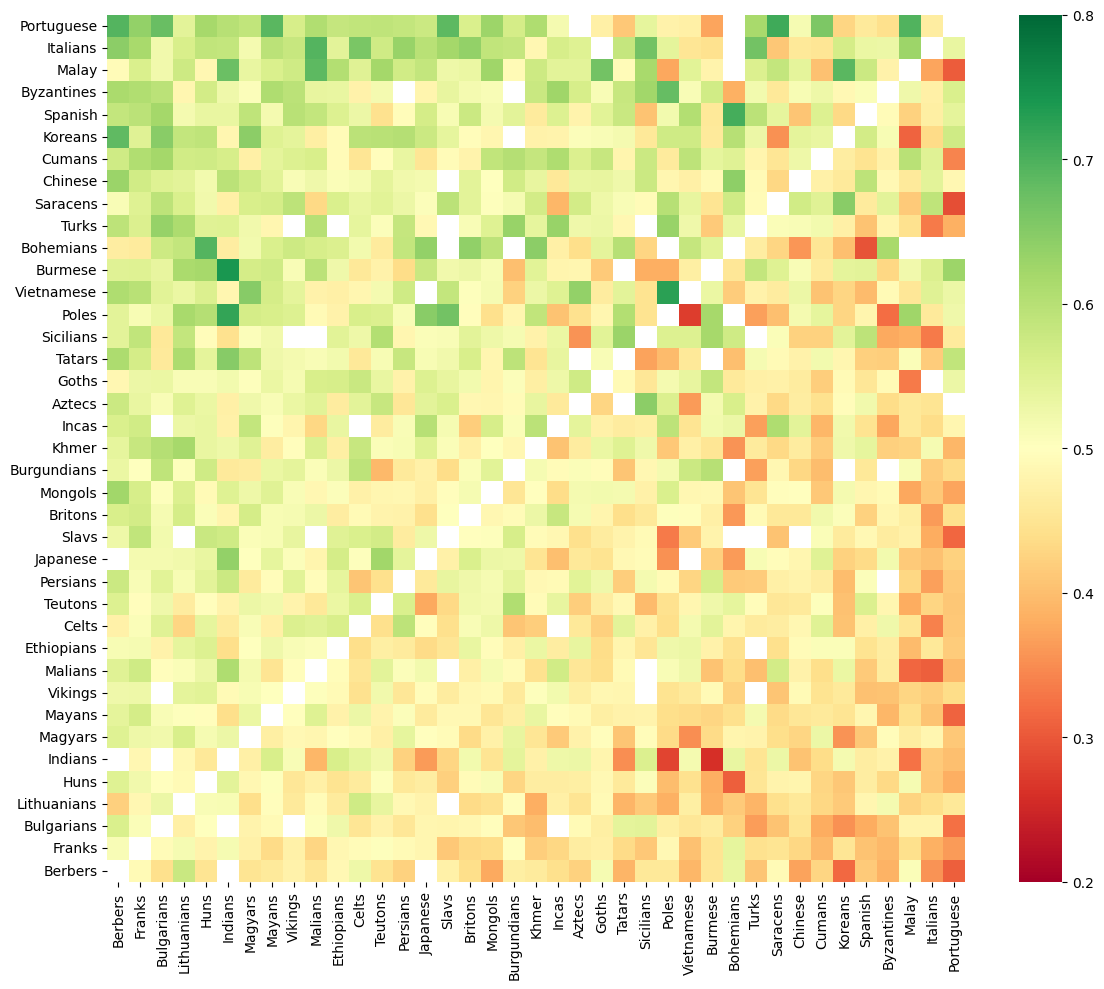

In [33]:
####heatmaps over elo for civs#####
name = 'civ_civ_heatmap_elo_'


for index,elo_id in enumerate(elo_windows):
    win_df = pd.DataFrame.from_dict(wr_elo_crosstabs[elo_id])
    win_df = win_df.fillna(value=np.nan)
    if index ==0:
        order = win_df.mean().sort_values(ascending=False).index
    win_df = win_df.reindex(order,axis=1)
    win_df = win_df.reindex(order,axis=0)
    #plot

    #filter by top10
    #win_df = win_df[top10civs]
    #win_df = win_df.loc[top10civs]

    plt.rcParams["figure.figsize"] = (12,10)
    sns.heatmap(win_df,cmap = 'RdYlGn',vmin=.2,vmax=.8, cbar=True)
    if elo_steps:
        plt.title(f'Elo {elo_windows[elo_id]["label"]} ({matches_per_elo_dict[elo_id]} Matches)')
    plt.axis([0,len(civs),0,len(civs)])

    plt.tight_layout()
    plt.savefig(viz_path+name+str(elo_id)+'.pdf',format='pdf')
    plt.show()


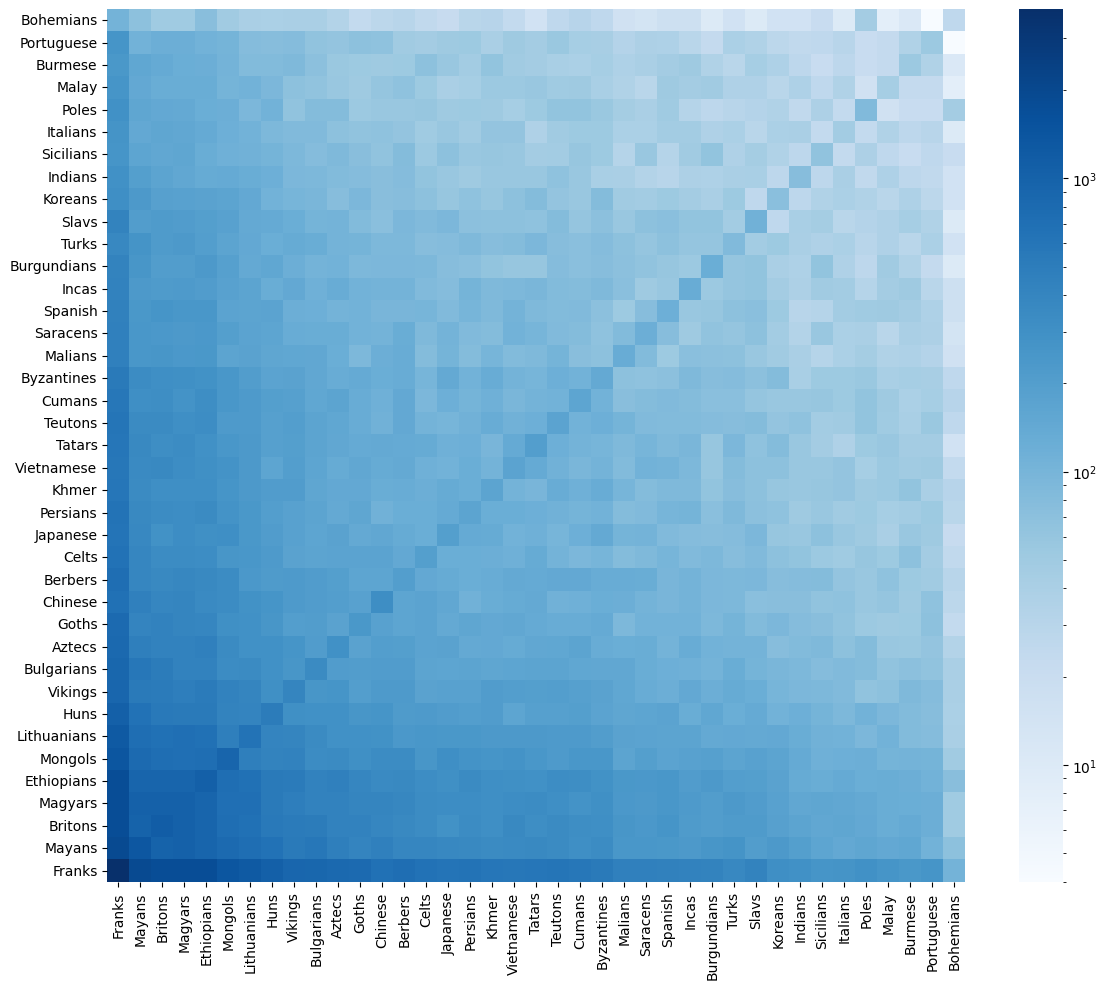

In [34]:
import matplotlib

name = 'civ_civ_freq_heatmap'

freq_df = matchcount_df#pd.DataFrame.from_dict()
freq_df = freq_df.fillna(value=np.nan)
if index ==0:
    order = freq_df.mean().sort_values(ascending=False).index
freq_df = freq_df.reindex(order,axis=1)
freq_df = freq_df.reindex(order,axis=0)
#plot

#filter by top10
#win_df = win_df[top10civs]
#win_df = win_df.loc[top10civs]

plt.rcParams["figure.figsize"] = (12,10)
sns.heatmap(freq_df,cmap = 'Blues',vmin=0,vmax=3500, cbar=True,norm=matplotlib.colors.LogNorm())
plt.axis([0,len(civs),0,len(civs)])


plt.tight_layout()
plt.savefig(viz_path+name+str(elo_id)+'.pdf',format='pdf')
plt.show()



In [35]:
freq_df

,Franks,Mayans,Britons,Magyars,Ethiopians,Mongols,Lithuanians,Huns,Vikings,Bulgarians,...,Slavs,Koreans,Indians,Sicilians,Italians,Poles,Malay,Burmese,Portuguese,Bohemians
Franks,3778,1915,1758,1770,1762,1385,1251,1050,914,880,...,422,308,295,264,273,296,267,242,262,106
Mayans,1915,1336,973,1042,919,802,731,662,539,575,...,205,231,195,165,146,157,147,156,109,70
Britons,1758,973,1156,1042,924,725,676,560,524,511,...,219,186,167,151,160,147,128,138,120,50
Magyars,1770,1042,1042,1032,921,716,701,545,492,442,...,214,183,149,158,151,142,129,126,121,50
Ethiopians,1762,919,924,921,1056,728,680,539,525,435,...,199,177,136,128,140,126,129,122,108,74
Mongols,1385,802,725,716,728,918,476,426,440,334,...,179,168,138,116,119,122,104,107,102,49
Lithuanians,1251,731,676,701,680,476,632,413,404,348,...,142,147,127,111,109,94,108,83,79,41
Huns,1050,662,560,545,539,426,413,516,303,293,...,140,110,118,103,90,108,93,84,76,39
Vikings,914,539,524,492,525,440,404,303,400,260,...,123,100,92,90,86,65,70,88,80,40
Bulgarians,880,575,511,442,435,334,348,293,260,348,...,104,96,90,79,86,81,65,71,65,40


In [36]:
#settings
match_threshold = 10
time_steps = True


time_windows = {'early',}

elo_civ_wr = {}

wr_elo_crosstabs = {}
matches_per_elo_dict = {}

for elo_id in elo_windows:
    elo_df = matches_df[(matches_df['avg_elo'] < elo_windows[elo_id]['ub']) &  (matches_df['avg_elo'] >=  elo_windows[elo_id]['lb'])]
    civs = []
    elo_civ_wr[elo_id] = {}
    
    
    #collect civs
    for index, row in matches_df.iterrows():
        if row['p1_civ'] not in civs:
            civs.append(row['p1_civ'])
        if row['p2_civ'] not in civs:
            civs.append(row['p2_civ'])

    civs.sort()


    #create initial crosstab
    win_crosstab = {}
    winrate_crosstab = {}
    match_count = {}
    match_count_cum = {}
    matches_per_elo = elo_df.shape[0]

    for civ1 in civs: 
        win_crosstab[civ1] = {}
        #win_crosstab = {}
        match_count[civ1] = {}
        for civ2 in civs:
            win_crosstab[civ1][civ2] = 0
            match_count[civ1][civ2] = 0

    #sum up match results
    for index, row in elo_df.iterrows():
        val = 0 
        if row['winner'] == 0:
            win_crosstab[row['p1_civ']][row['p2_civ']] += 1
        elif row['winner'] ==1:
            win_crosstab[row['p2_civ']][row['p1_civ']] += 1

        match_count[row['p1_civ']][row['p2_civ']] += 1
        match_count[row['p2_civ']][row['p1_civ']] += 1
            
    #calculate winrate    
    for civ1 in win_crosstab:
        winrate_crosstab[civ1] = {}
        #keep stats
        cum_wins = 0 
        cum_matchcount = 0 
        
        for civ2 in win_crosstab[civ1]:
            if match_count[civ1][civ2] > match_threshold:
                winrate_crosstab[civ1][civ2] = win_crosstab[civ1][civ2]/match_count[civ1][civ2]
                cum_wins += win_crosstab[civ1][civ2]
                cum_matchcount += match_count[civ1][civ2]
            else: winrate_crosstab[civ1][civ2] = 0.5
        try:
            elo_civ_wr[elo_id][civ1] = cum_wins/cum_matchcount
        except: elo_civ_wr[elo_id][civ1] = 0.5
        
     
    #replace with none values
    for civ1 in winrate_crosstab:
        for civ2 in winrate_crosstab[civ1]:
            if winrate_crosstab[civ1][civ2] == 0.5:
                    winrate_crosstab[civ1][civ2] = None

    #win_df = pd.DataFrame.from_dict(winrate_crosstab)
    

    #safe and next iteration
    wr_elo_crosstabs[elo_id] = winrate_crosstab
    matches_per_elo_dict[elo_id] = matches_per_elo

   
matchcount_df = pd.DataFrame.from_dict(match_count)


In [37]:
name = "civ_civ_wr_dist"
full = True
if elo_steps:
    elo_order = ['Low Elo','Medium Elo','High Elo']
    
    if not full:
        top10civs = ordered_civs[:10]
        sns.set(rc={'figure.figsize':(7,5)})
    else: 
        top10civs = ordered_civs
        sns.set(rc={'figure.figsize':(7,14)})
        
        
    civ_op_dict = {}

    for index,elo_id in enumerate(elo_frames):
        for civ1 in wr_elo_crosstabs[elo_id]:
            for civ2 in wr_elo_crosstabs[elo_id][civ1]:
                civ_op_dict[f'{civ1}_{civ2}_{elo_id}'] = {'Civilization': civ1, 'opp': civ2, 'Elo': elo_frames[elo_id]['label'], 'Winrate': wr_elo_crosstabs[elo_id][civ1][civ2]}

    civ_op_df = pd.DataFrame.from_dict(civ_op_dict).transpose().sort_values(by='Winrate')
    civ_op_df= civ_op_df.fillna(value=np.nan)
    civ_op_df = civ_op_df[civ_op_df['Civilization'].isin(top10civs)]
    civ_op_df.head()
    

    
    sns.set_style("whitegrid")
    fix,axes = plt.subplots()
    

    sns.boxplot(data=civ_op_df,x='Winrate',y='Civilization',hue='Elo',hue_order = elo_order,width=0.8)

    #axes.set_axisbelow(True)
    axes.xaxis.grid(color='lightgrey', linestyle='--', linewidth=0.5,which='major')
    #axes.axvline(0.5, color='k', linestyle='dashed', linewidth=1)
    plt.tight_layout()
    if full:
        plt.savefig(viz_path+name+'_full' + '.pdf',format='pdf')
    else: plt.savefig(viz_path+name+ '.pdf',format='pdf')
    plt.show()

In [38]:
########winrate against civ over elo for targetciv
target_civ = 'Franks'
top_n_scope = 10 


x = []
y = {}

for civ in civs:
    y[civ] = []

for elo in elo_frames:
    x.append(elo)
    for civ in wr_elo_crosstabs[elo][target_civ]:
        y[civ].append(wr_elo_crosstabs[elo][target_civ][civ])

for civ in ordered_civs[:top_n_scope]:
    plt.plot(x, y[civ],'--o',label = civ)

plt.rcParams["figure.figsize"] = (10,4)
    
plt.axhline(0.5, color='k', linestyle='dashed', linewidth=1)
plt.title(f'Winrate of {target_civ} against top{top_n_scope} played civs over Elo')
plt.legend()
plt.show()

KeyError: 'low'

In [ ]:
########agg winrate over time for target civs
top_n_scope = 10

if True:
    target_civs = ordered_civs[:top_n_scope]  #['Franks','Britons'] 
    x = []
    y = {}
    for civ in civs:
        y[civ] = []

    for elo in elo_civ_wr:
        x.append(elo)
        val = 0
        for civ in elo_civ_wr[elo]:
            val += elo_civ_wr[elo][civ]
            y[civ].append(elo_civ_wr[elo][civ])

    plt.rcParams["figure.figsize"] = (10,4)    

    for civ in target_civs:
        plt.plot(x, y[civ], '--o',label = civ)

    plt.axhline(0.5, color='k', linestyle='dashed', linewidth=1)
    plt.title(f'Aggregated Winrate of top{top_n_scope} played civs over Elo')
    plt.legend()
    plt.show()

In [ ]:
s = win_df.sum()
sort_win_df = win_df[s.sort_values(ascending=False).index[:50]]
sort_civs = sort_win_df.columns
t_sort_win_df = sort_win_df.transpose()
s2 = t_sort_win_df.sum()
sort_win_df = t_sort_win_df[s2.sort_values(ascending=False).index[:50]]
#sort_win_df

In [ ]:
sort_cols = sort_win_df.columns.tolist()
sort_cols.reverse()
#sort_cols

In [ ]:
#settings
match_threshold = 10

time_lb = 0
time_range = 180
time_max = 3000
time_frames = []

time_civ_wr = {}
time_civ_count = {}

wr_time_crosstabs = {}
matches_per_time_dict = {}

while time_lb <= time_max:
    time_df = matches_df[(matches_df['duration'] <= (time_lb + time_range)) &  (matches_df['duration'] > time_lb)]
    civs = []
    time_civ_wr[time_lb] = {}
    time_civ_count = {}
    
    #collect civs
    for index, row in matches_df.iterrows():
        if row['p1_civ'] not in civs:
            civs.append(row['p1_civ'])
        if row['p2_civ'] not in civs:
            civs.append(row['p2_civ'])

    civs.sort()


    #create initial crosstab
    win_crosstab = {}
    winrate_crosstab = {}
    match_count = {}
    match_count_cum = {}
    matches_per_time = time_df.shape[0]

    for civ1 in civs: 
        win_crosstab[civ1] = {}
        #win_crosstab = {}
        match_count[civ1] = {}
        for civ2 in civs:
            win_crosstab[civ1][civ2] = 0
            match_count[civ1][civ2] = 0

    #sum up match results
    for index, row in time_df.iterrows():
        val = 0 
        if row['winner'] == 0:
            win_crosstab[row['p1_civ']][row['p2_civ']] += 1
        elif row['winner'] ==1:
            win_crosstab[row['p2_civ']][row['p1_civ']] += 1

        match_count[row['p1_civ']][row['p2_civ']] += 1
        match_count[row['p2_civ']][row['p1_civ']] += 1
            
    #calculate winrate    
    for civ1 in win_crosstab:
        winrate_crosstab[civ1] = {}
        #keep stats
        cum_wins = 0 
        cum_matchcount = 0 
        
        for civ2 in win_crosstab[civ1]:
            if match_count[civ1][civ2] > match_threshold:
                winrate_crosstab[civ1][civ2] = win_crosstab[civ1][civ2]/match_count[civ1][civ2]
                cum_wins += win_crosstab[civ1][civ2]
                cum_matchcount += match_count[civ1][civ2]
            else: winrate_crosstab[civ1][civ2] = 0.5
        try:
            time_civ_wr[time_lb][civ1] = cum_wins/cum_matchcount
        except: time_civ_wr[time_lb][civ1] = 0.5
        
     
    #replace with none values
    for civ1 in winrate_crosstab:
        for civ2 in winrate_crosstab[civ1]:
            if winrate_crosstab[civ1][civ2] == 0.5:
                    winrate_crosstab[civ1][civ2] = None

    #win_df = pd.DataFrame.from_dict(winrate_crosstab)
    

    #safe and next iteration
    wr_time_crosstabs[time_lb] = winrate_crosstab
    matches_per_time_dict[time_lb] = matches_per_time
    
    time_frames.append(time_lb)
    time_lb += time_range
  
   
matchcount_df = pd.DataFrame.from_dict(match_count)

In [ ]:
time_civ_wr

In [ ]:
########agg winrate over time for target civs
name = "agg_wr_time"

top_n_scope = 10

if True:
    target_civs = ordered_civs[:top_n_scope]  #['Franks','Britons'] 
    x = []
    y = {}
    for civ in civs:
        y[civ] = []

    for time in time_civ_wr:
        x.append(time)
        val = 0
        for civ in time_civ_wr[time]:
            val += time_civ_wr[time][civ]
            y[civ].append(time_civ_wr[time][civ])

    plt.rcParams["figure.figsize"] = (12,6)    

    for civ in target_civs:
        plt.plot(x, y[civ], '--o',label = civ)
    
    #infolines
    plt.axvline(505, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(800, color='k', linestyle='dashed', linewidth=1)
    plt.axvline(1200, color='k', linestyle='dashed', linewidth=1)
    plt.text(355,0.65,"[F]",rotation=0, fontsize = 14)
    plt.text(650,0.65,"[C]",rotation=0, fontsize = 14)
    plt.text(1075,0.65,"[I]",rotation=0, fontsize = 14)
    
    
    plt.axhline(0.5, color='k', linestyle='dotted', linewidth=1)
    
    #layout
    plt.grid(color='lightgrey', linestyle='--', linewidth=0.5,which='major',axis='y')
    plt.xlabel("Game Duration in seconds", fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel("Mean Winrate",fontsize=14)
    plt.yticks(np.arange(0.2,0.9,0.1),fontsize=14)
    plt.margins(x=0.0)

        
    plt.legend(bbox_to_anchor=(1, 1),frameon = False,fontsize=14)
    plt.tight_layout()
    plt.savefig(viz_path+name+ '.pdf',format='pdf')
    plt.show()
    
    

Map 

In [ ]:
def get_distance(coord1: list,coord2: list):
  """returns distance between 2 2D Coordinates"""
  distance = np.linalg.norm(np.array(coord1)-np.array(coord2))
  return distance

def get_distance_to_center(coord):
  """ returns the distance between a 2D coordinate and the map center"""
  center_distance = get_distance(coord,[59,59])
  return center_distance

map_win_array = np.full((120,120),np.nan)
map_freq_array = np.full((120,120),np.nan)



for index, row in arabia_df.iterrows(): 
    #assign winner coords
    if row['winner'] == 0:
        win_id = 1
        lose_id = 2
    else:
        win_id = 2
        lose_id = 1
    
    #determine coordinates
    win_x = math.floor(row[f'p{win_id}_xpos'])
    win_y = math.floor(row[f'p{win_id}_ypos'])
    lose_x = math.floor(row[f'p{lose_id}_xpos'])
    lose_y = math.floor(row[f'p{lose_id}_ypos'])
    
    
    #fill win array
    if np.isnan(map_win_array[win_x][win_y]):
            map_win_array[win_x][win_y]= 1
    else:
        map_win_array[win_x][win_y]+= 1
        
    if np.isnan(map_win_array[lose_x][lose_y]):
            map_win_array[lose_x][lose_y]= -1
    else:
        map_win_array[lose_x][lose_y]-= 1 
        
    if np.isnan(map_freq_array[win_x][win_y]):
        map_freq_array[win_x][win_y] = 1
    else:
        map_freq_array[win_x][win_y] += 1
        
    if np.isnan(map_freq_array[win_x][win_y]):
        map_freq_array[lose_x][lose_y]  = 1
    else:
        map_freq_array[lose_x][lose_y]  += 1
    

In [ ]:
if True:
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
    name = "tc_win_dist"
    
    plt.rcParams["figure.figsize"] = (8,6.5)


    ax = sns.heatmap(map_win_array, cmap='RdYlGn',cbar=True,cbar_kws={'label': 'Sum of Wins'})
    ax.figure.axes[-1].yaxis.label.set_size(18)
    ax.tick_params(labelsize=18)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    ax.set_yticks(range(0,121,20),labels= range(120,-1,-20))
    ax.set_xticks(range(0,121,20),labels= range(0,121,20))
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    plt.grid()
    plt.ylabel("Starting Town Center Y-Coordinate",fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel("Starting Town Center X-Coordinate", fontsize=18)
    plt.xticks(fontsize=18,rotation=0)
    #plt.imshow(map_win_array, cmap='RdYlGn', interpolation='nearest')
    #cbar = plt.colorbar()
    plt.tight_layout()
    plt.savefig(viz_path+name+ '.pdf',format='pdf')
    plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
name = "mean_elo_dist"

plt.imshow(map_freq_array, cmap='Oranges', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
elo_dfs = []
#for tf in time_list: 
with open(f"data/minn/elo_all/recordfile_tab_data_{4920}.pkl", 'rb') as f:
    full_df = pickle.load(f)

for elo_key in elo_frames:
    elo_tab_data_df =  full_df[(full_df['avg_elo']>= elo_frames[elo_key]['lb']) & (full_df['avg_elo']< elo_frames[elo_key]['ub'])]
    elo_tab_data_df['elo_key'] = [elo_key for i in range(len(elo_tab_data_df))]
    elo_dfs.append(elo_tab_data_df)
    
complete_df = pd.concat(elo_dfs)

In [ ]:
complete_df.groupby(['elo_key'])['elo_key'].count()

In [ ]:
name = 'duration_elo_dist'

plt.rcParams["figure.figsize"] = (10,2)
sns.boxplot(data=complete_df[complete_df['duration'] <= 7000],x='duration',y='elo_key')

plt.yticks(fontsize=14)
plt.xticks(range(0,8001,1000),fontsize=14)
plt.ylabel('Elo',fontsize=18)
plt.xlabel('Match Duration in Seconds',fontsize=18)
plt.margins(x=0)
plt.tight_layout()
plt.savefig(viz_path + name+ '.pdf',format='pdf')
plt.show()

In [ ]:
for elo in elo_frames:
    print(elo,complete_df[complete_df['elo_key']==elo]['duration'].mean())

In [ ]:
sub_df = complete_df.sample(n=13922)

In [ ]:
len(sub_df)